In [4]:
import remeta
from remeta.transform import compute_nonlinear_encoding as nonlinear_encoding, logistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [5]:
np.random.seed(1)

In [19]:
nsamples = 100000
gains = [-0.88, -0.5, -0.25, -0.1, 0, 0.5, 1, 2, 4]
x = np.arange(-1, 1, 0.001)

params = dict(
    type1_noise=0.5,
    type1_bias=0,
    type1_nonlinear_encoding_gain=1
)
cfg = remeta.Configuration()
cfg.skip_type2 = True
cfg.enable_param_type1_nonlinear_encoding_gain = 1
cfg.type2_noise_dist = 'truncated_norm_mode'

In [7]:
d = remeta.simu_data(nsubjects=1, nsamples=nsamples, params=params, cfg=cfg, x_stim_external=None, verbosity=True,
                     squeeze=True, compute_stats=True)

----------------------------------
..Generative parameters:
    type1_noise: 0.5
    type1_bias: 0
    type1_nonlinear_encoding_gain: 1
..Descriptive statistics:
    No. subjects: 1
    No. samples: 100000
    Performance: 84.6% correct
    Choice bias: -0.1%
----------------------------------


(-0.5, 1.5)

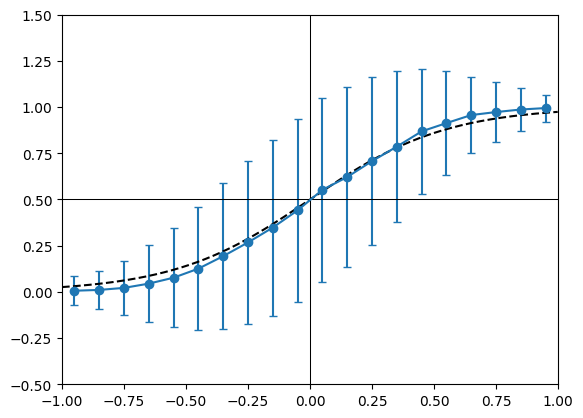

In [18]:
plt.figure()
# plt.plot(d.stimuli, d.y_decval, 'o')

edges = np.arange(np.min(d.stimuli), np.max(d.stimuli) + 0.1, 0.1)
mean, sd = [binned_statistic(d.stimuli, d.choices, statistic=stat, bins=edges)[0] for stat in ('mean', 'std')]
centers = (edges[:-1] + edges[1:]) / 2

plt.errorbar(centers, mean, yerr=sd, fmt="o-", capsize=3)

# plt.plot([-1, 1], [0, 1], 'k--')
plt.plot(x, logistic(x, params['type1_noise']), 'k--')
plt.plot([0, 0], [-2, 2], 'k', lw=0.75)
plt.plot([-1, 1], [0.5, 0.5], 'k', lw=0.75)
plt.xlim(-1, 1)
plt.ylim(-0.5, 1.5)

In [20]:
colors = plt.get_cmap('gnuplot')(np.linspace(0, 1, len(gains)))
colors.shape

(9, 4)

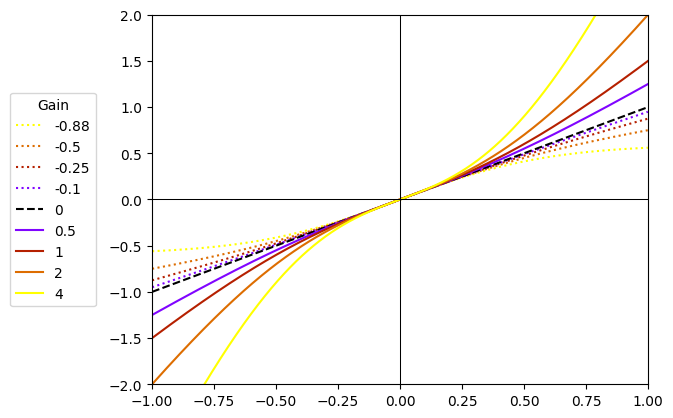

In [21]:
plt.figure()
colors = plt.get_cmap('gnuplot')(np.linspace(0, 1, int(len(gains)/2)+1))
colors = np.vstack((colors[1:][::-1], colors))
for i, gain in enumerate(gains):
    plt.plot(x, nonlinear_encoding(x, type1_nonlinear_encoding_gain=gain), label=f'{gain}', color=colors[i], ls=':' if gain < 0 else ('--' if gain == 0 else '-'))
plt.plot([0, 0], [-2, 2], 'k', lw=0.75)
plt.plot([-1, 1], [0, 0], 'k', lw=0.75)
plt.xlim(-1, 1)
plt.ylim(-2, 2)
plt.legend(title='Gain', bbox_to_anchor=(-0.2, 0.5), loc='center')

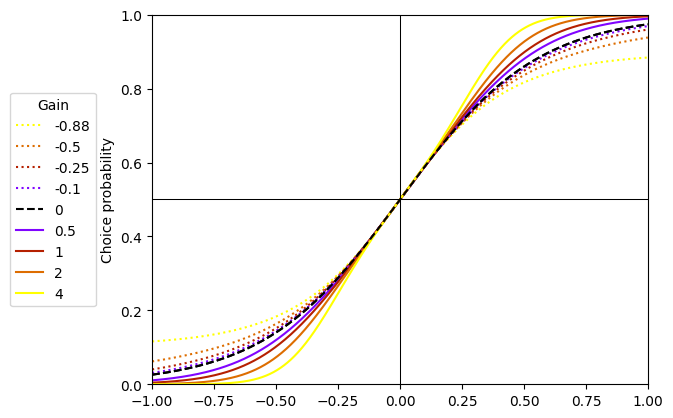

In [24]:
plt.figure()
x = np.arange(-1, 1, 0.001)
gains = [-0.88, -0.5, -0.25, -0.1, 0, 0.5, 1, 2, 4]
colors = plt.get_cmap('gnuplot')(np.linspace(0, 1, int(len(gains)/2)+1))
colors = np.vstack((colors[1:][::-1], colors))
for i, gain in enumerate(gains):
    plt.plot(x, logistic(nonlinear_encoding(x, type1_nonlinear_encoding_gain=gain), params['type1_noise']), label=f'{gain}', color=colors[i], ls=':' if gain < 0 else ('--' if gain == 0 else '-'))
plt.plot(x, logistic(x, params['type1_noise']), 'k--')
plt.plot([0, 0], [0, 1], 'k', lw=0.75)
plt.plot([-1, 1], [0.5, 0.5], 'k', lw=0.75)
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.ylabel('Choice probability')
plt.legend(title='Gain', bbox_to_anchor=(-0.2, 0.5), loc='center')

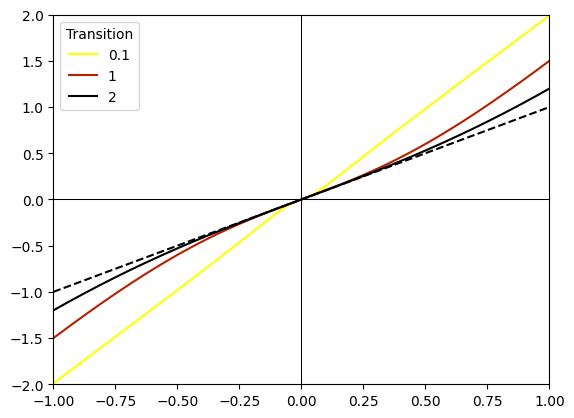

In [25]:
plt.figure()
x = np.arange(-1, 1, 0.001)
transitions = [0.1, 1, 2]
colors = plt.get_cmap('gnuplot')(np.linspace(0, 1, len(transitions)))[::-1]
for i, transition in enumerate(transitions):
    plt.plot(x, nonlinear_encoding(x, type1_nonlinear_encoding_gain=1, type1_nonlinear_encoding_transition=transition), label=f'{transition}', color=colors[i])
plt.plot([-1, 1], [-1, 1], 'k--')
plt.plot([0, 0], [-2, 2], 'k', lw=0.75)
plt.plot([-1, 1], [0, 0], 'k', lw=0.75)
plt.xlim(-1, 1)
plt.ylim(-2, 2)
plt.legend(title='Transition')